# Part 1: Prepare the Data

In [1]:
import pandas as pd
file = 'Resources/myopia.csv'
df = pd.read_csv(file)

In [2]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
new_df = df.drop(['MYOPIC'], axis='columns')
new_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [5]:
new_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [6]:
scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)
scaled_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


# Part 2: Apply Dimensionality Reduction

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(scaled_data)
myopia_pca_df = pd.DataFrame(myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [8]:
myopia_pca_df = pd.DataFrame(data=myopia_pca, columns=["principal component 1", "principal component 2", 
                                                       "principal component 3", "principal component 4", 
                                                       "principal component 5", "principal component 6", 
                                                       "principal component 7", "principal component 8", 
                                                       "principal component 9", "principal component 10"])
myopia_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


**How did the number of features change?**

In my PCA model, I preserved the variance at 90 percent, and the number of features reduced from 14 to 10. 

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)

/Users/alice/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [10]:
tsne_df = pd.DataFrame()
tsne_df["x"] = transformed_features[:,0]
tsne_df["y"] = transformed_features[:,1]
tsne_df["class"] = df["MYOPIC"]
tsne_df.head()

,x,y,class
0,3.415234,-15.202623,1
1,10.806069,0.485946,0
2,-15.571196,7.513361,0
3,0.811933,8.853162,1
4,-6.548190,-9.727340,0


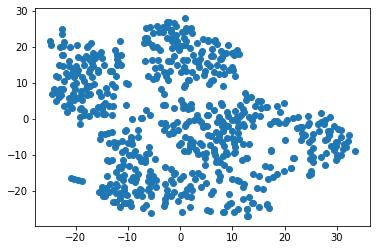

In [11]:
import matplotlib.pyplot as plt
plt.scatter(tsne_df["x"], tsne_df["y"])
plt.show()

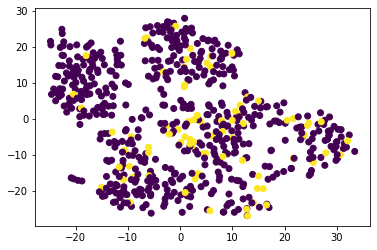

In [12]:
plt.scatter(tsne_df["x"], tsne_df["y"], c=tsne_df["class"])
plt.show()

**Are there distinct clusters?**

There are potentially 5 distinct clusters shown by plotting the data after t-SNE, or perhaps 3. They are not very distinct.

# Part 3: Perform a Cluster Analysis with K-means

In [13]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 10))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


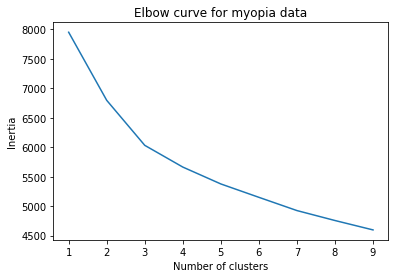

In [14]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [15]:
model = KMeans(n_clusters=3, random_state=5)
model.fit(myopia_pca_df)
predictions = model.predict(myopia_pca_df)
print(predictions)

[1 2 1 1 2 1 1 1 2 1 0 2 1 2 2 2 2 2 0 1 1 1 1 0 2 1 2 2 2 2 1 0 2 1 2 2 0
 2 1 2 1 2 0 2 1 2 0 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 0 2 1 2 2 1 0 2 0 0
 2 2 2 0 1 1 1 1 1 2 1 2 0 0 2 2 2 1 2 2 1 0 1 2 2 2 0 1 0 1 0 0 1 1 1 1 0
 1 2 2 1 1 2 1 2 1 1 1 2 2 0 0 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2
 2 0 1 1 0 2 1 1 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 1 0 1 1 2 2 1 1 2 2 0 1 2 2
 0 1 1 2 2 2 2 2 2 1 0 1 2 1 1 1 1 2 1 2 1 1 2 1 2 0 2 2 1 1 2 0 1 2 1 2 1
 0 1 1 0 0 2 1 2 0 2 1 0 2 2 1 1 2 2 0 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 1 1 2
 1 2 1 1 2 1 2 1 2 1 1 2 2 2 0 2 1 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 1 2 1 0 1
 1 1 0 1 1 2 1 0 2 2 0 1 1 0 1 1 1 2 1 1 1 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 1 2 0 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1
 2 2 2 1 0 2 2 1 1 2 0 1 2 2 2 0 1 0 2 0 1 0 2 1 2 1 2 1 2 2 2 1 2 0 0 1 2
 0 2 2 2 2 1 2 1 1 1 2 2 1 0 0 1 1 0 2 2 0 1 2 0 2 1 1 1 1 1 0 1 0 1 1 1 0
 2 1 2 1 1 2 0 0 2 0 1 2 2 1 2 2 1 2 1 1 0 2 1 0 1 0 1 0 2 1 0 2 1 2 1 2 1
 1 2 0 2 2 1 0 2 0 0 1 1 

In [16]:
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


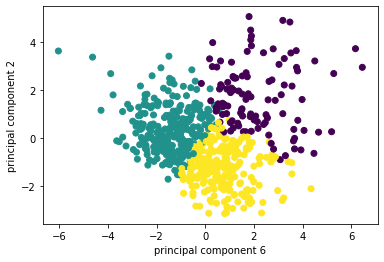

In [28]:
plt.scatter(x=myopia_pca_df['principal component 1'], y=myopia_pca_df['principal component 2'], c=myopia_pca_df["class"])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [32]:
#performing kmeans with original scaled data 
inertia = []
k = list(range(1, 10))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361


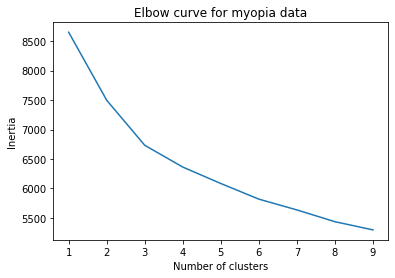

In [33]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# Part 4: Make a Recommendation

Based on the analysis, I would recommend grouping the patients into 3 clusters. Though one might think there would be 2 distinct clusters (myopia or no myopia), the analysis shows that there could be more distinct categories that could be worth looking into. In the tSNE plot, we saw the clusters could possibly be 3 or even 5 disinct clusters, and through KMeans we narrowed down to 3 clusters. Plotting different components against one another using 3 clusters, we are able to produce some plots that do have 3 distinct clusters.